In [116]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [117]:
df = pd.read_csv("/Users/mrbinit/Desktop/tangile/diabetes.csv")

In [118]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [119]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [121]:
df.shape

(768, 9)

In [122]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [123]:
# Summary statistics
summary_statistics= df.describe()
print(summary_statistics)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [124]:
missing_value = df.isnull().sum()
print(missing_value)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Good news. No missing value. So, I dont need to handle this. 

### Data Overview

1. The dataset consists of 768 observations and 9 columns.
2. No missing values in any of the columns.
3. Some columns have zero values, which might indicate missing or incorrect data points, particularly for columns like `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI`.


### Visualize distribution

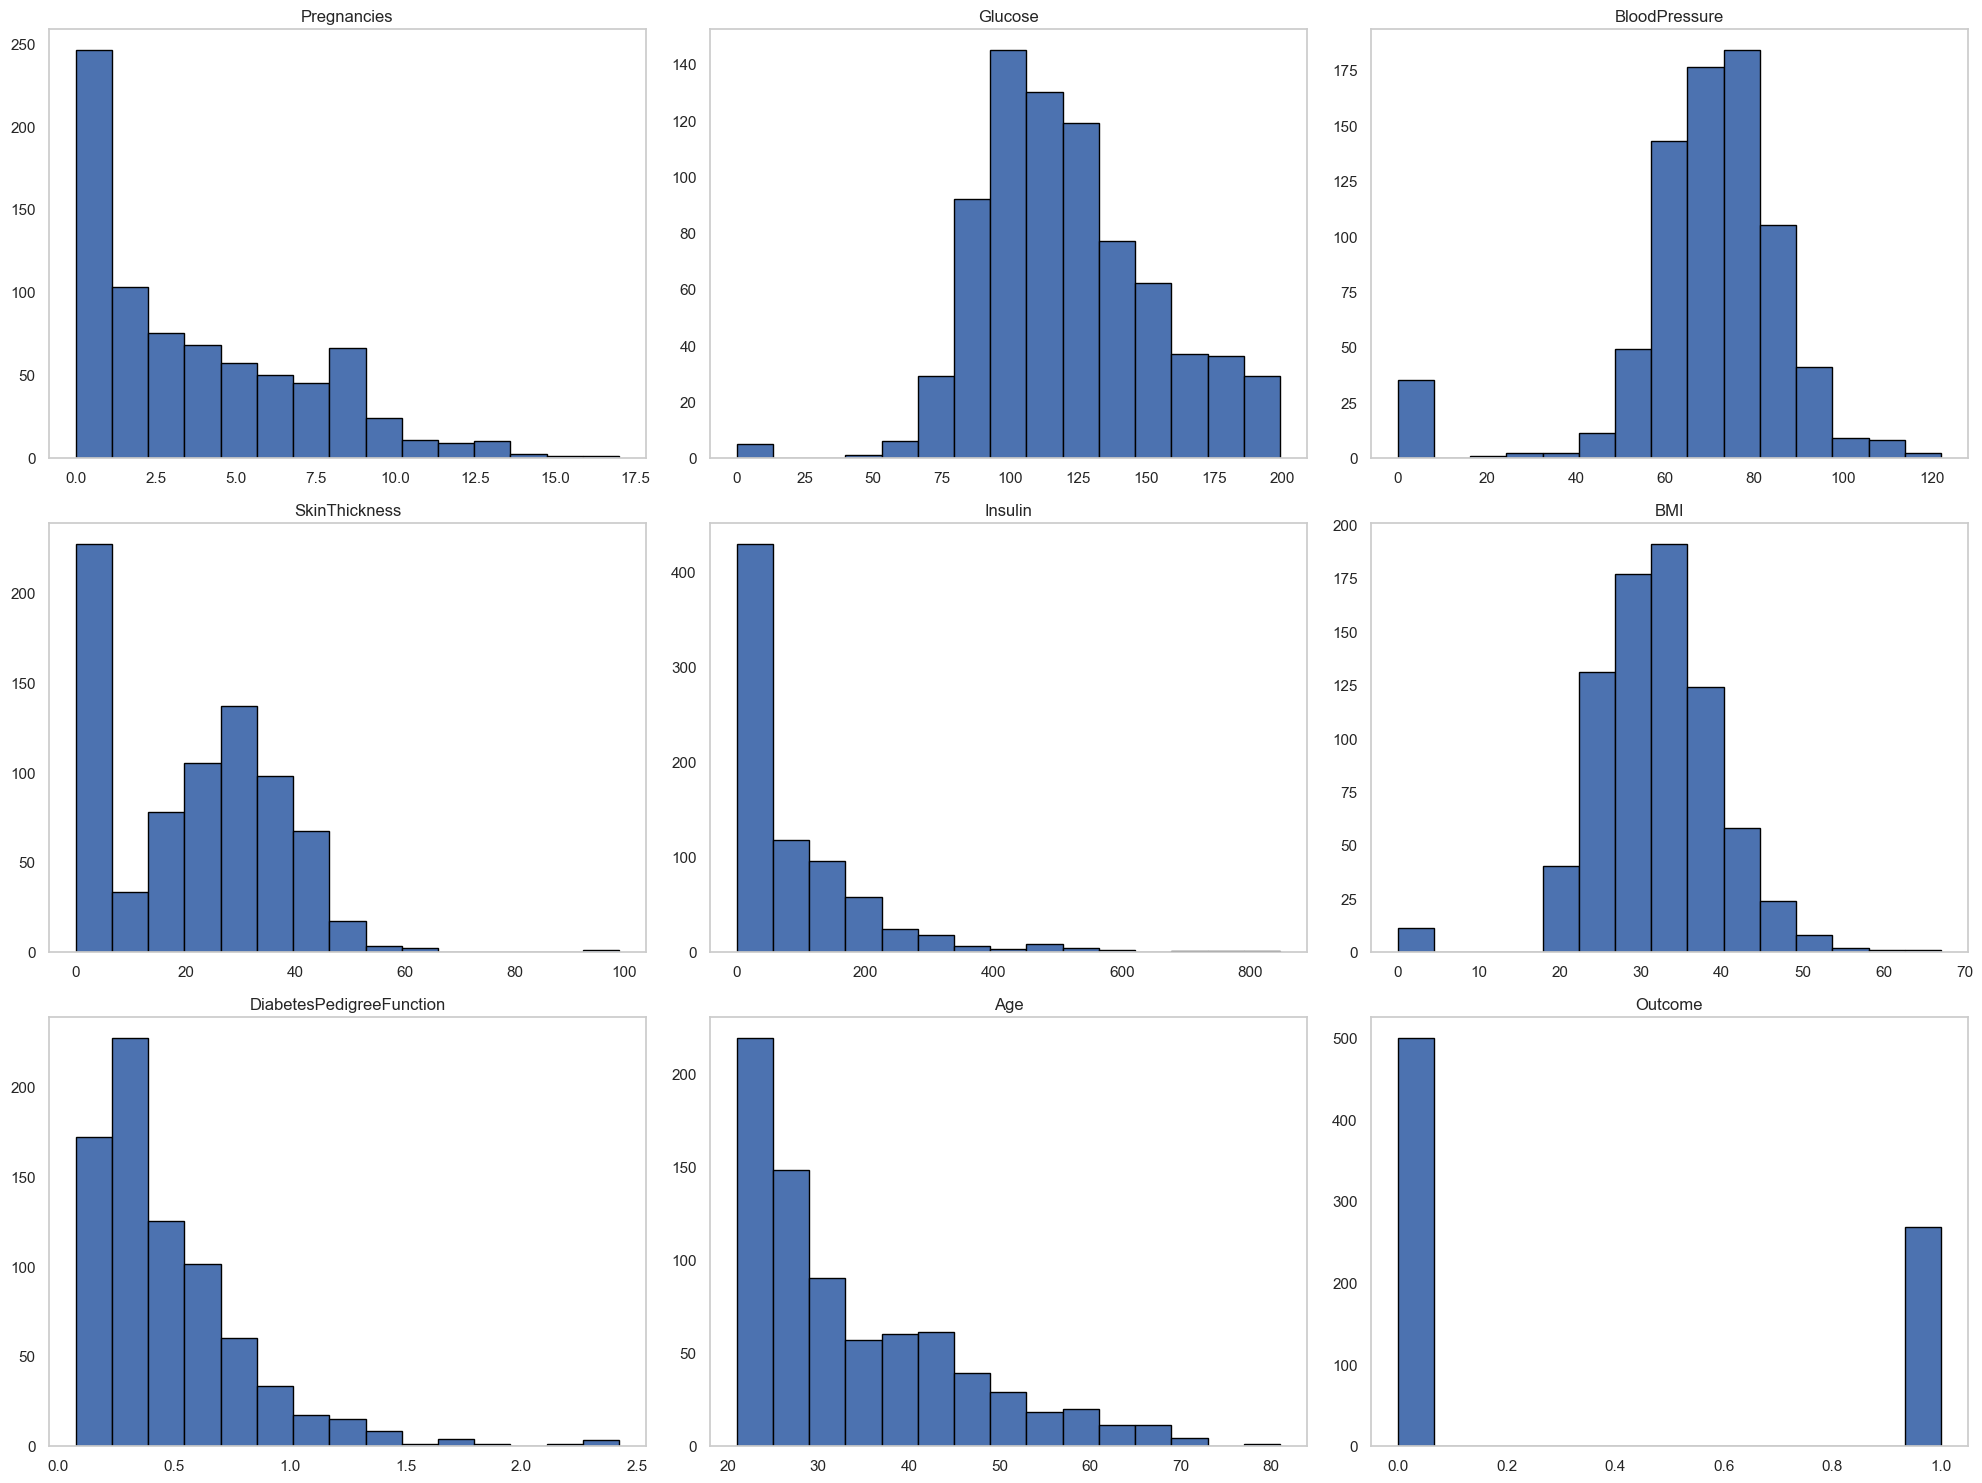

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot histograms for numerical features
df.hist(bins=15, figsize=(20, 15), layout=(3, 3), edgecolor='black', grid=False)
plt.tight_layout()
plt.show()



# Boxplot of Outcome

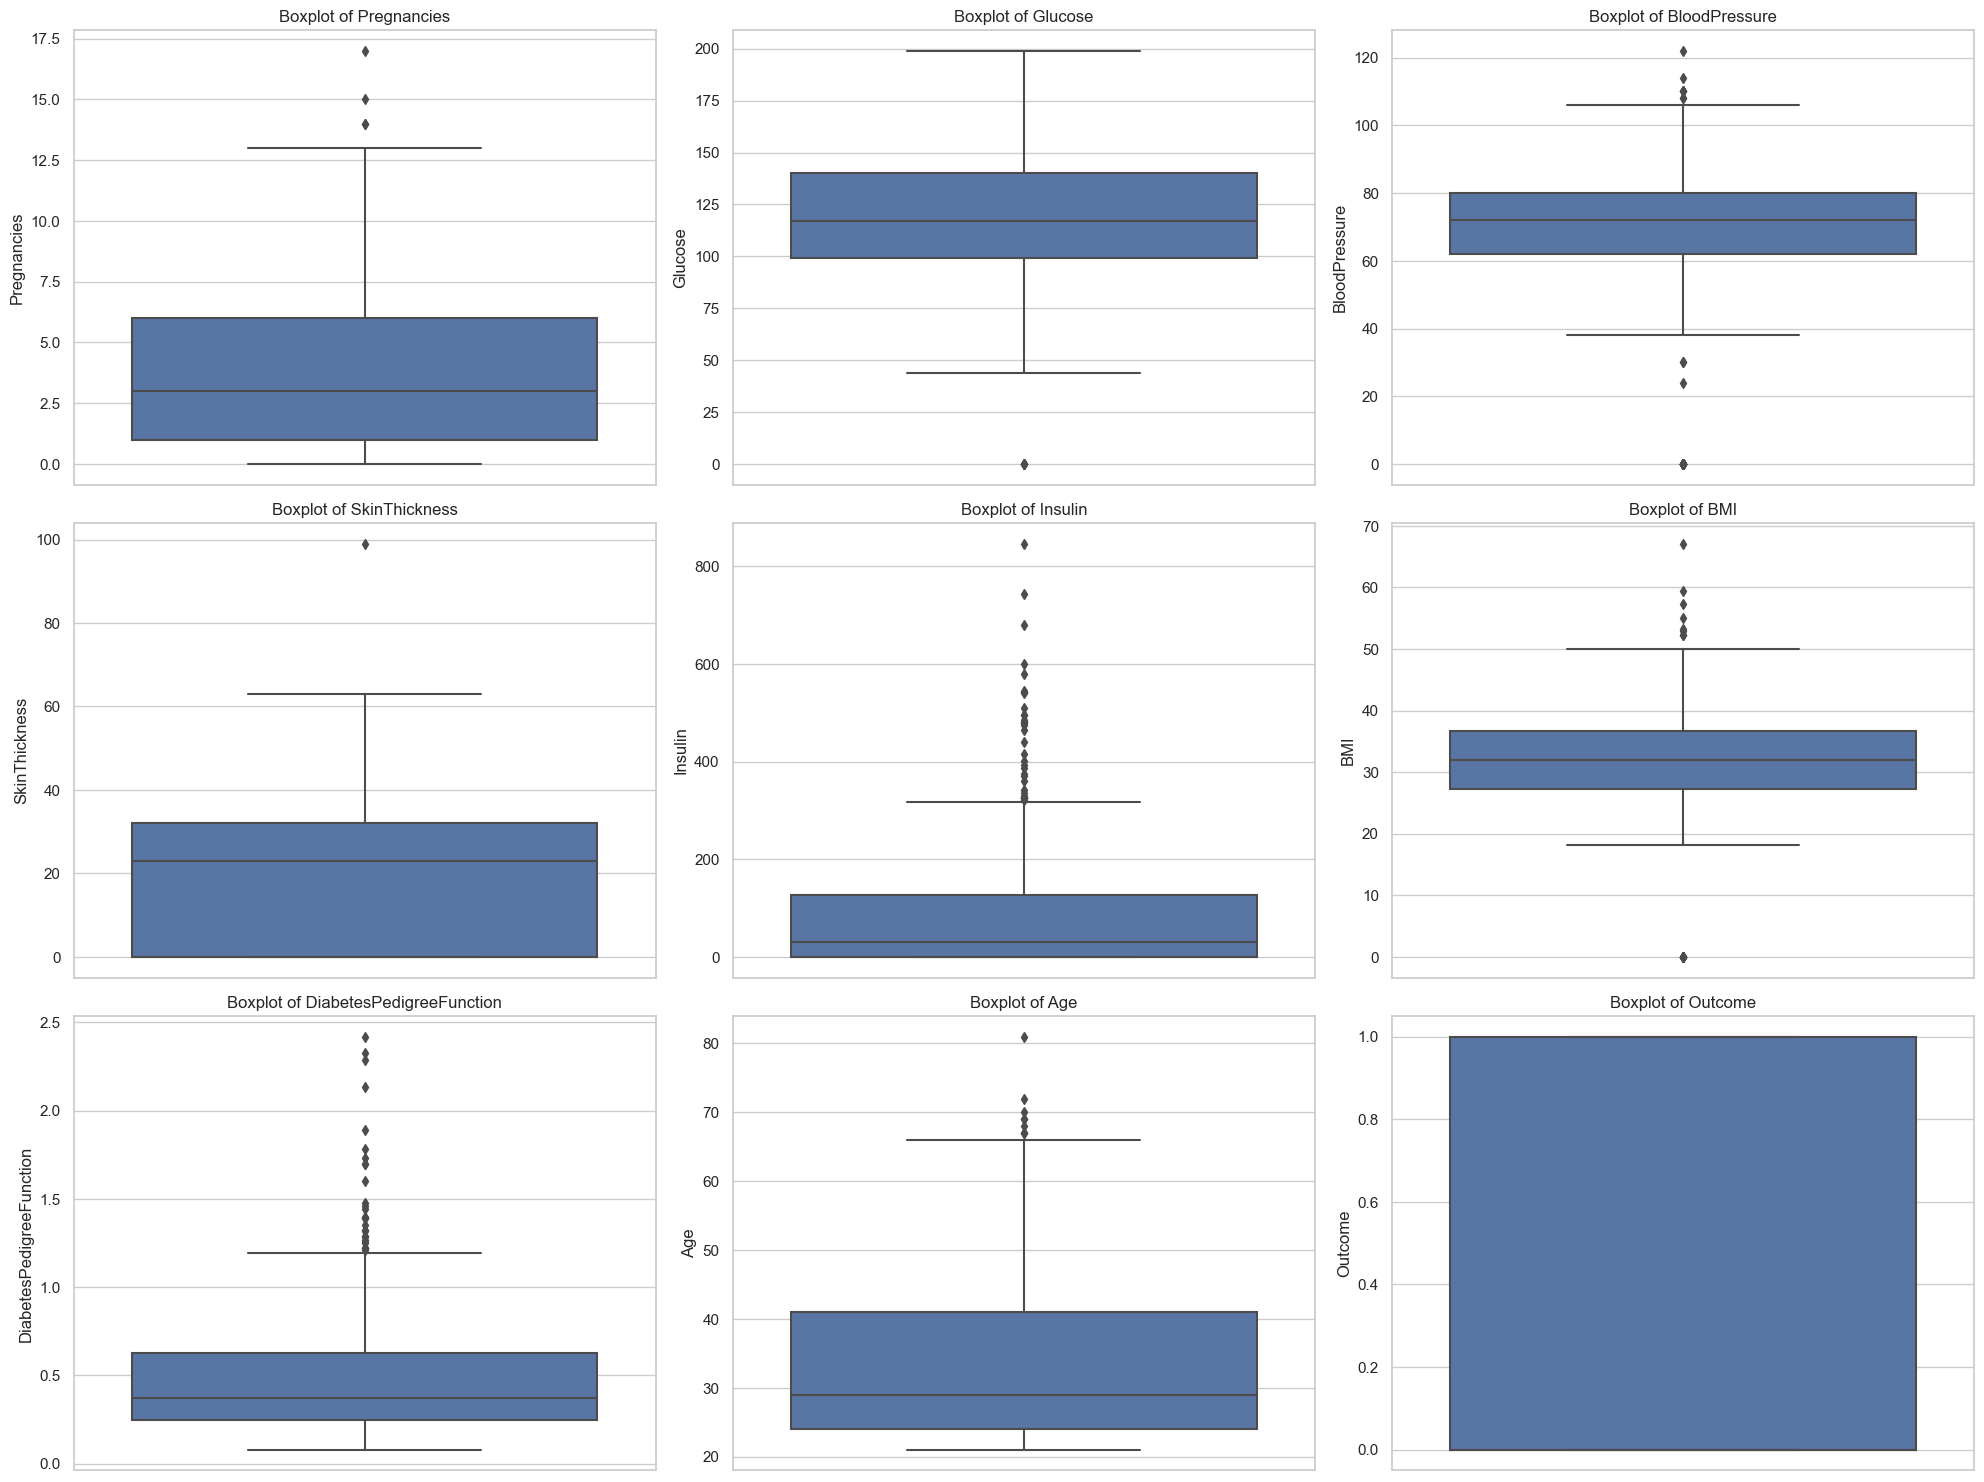

In [126]:
# Plot boxplots for numerical features
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

### Correlation matrix Heatmap

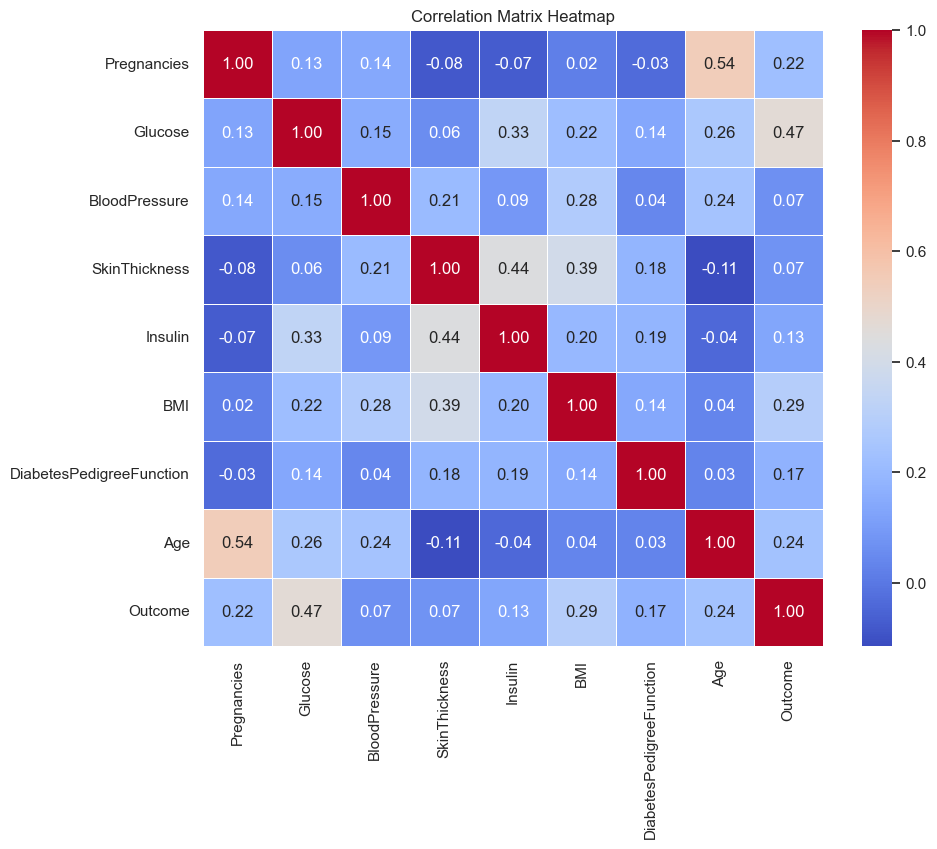

In [127]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


### Outcome distribution plot


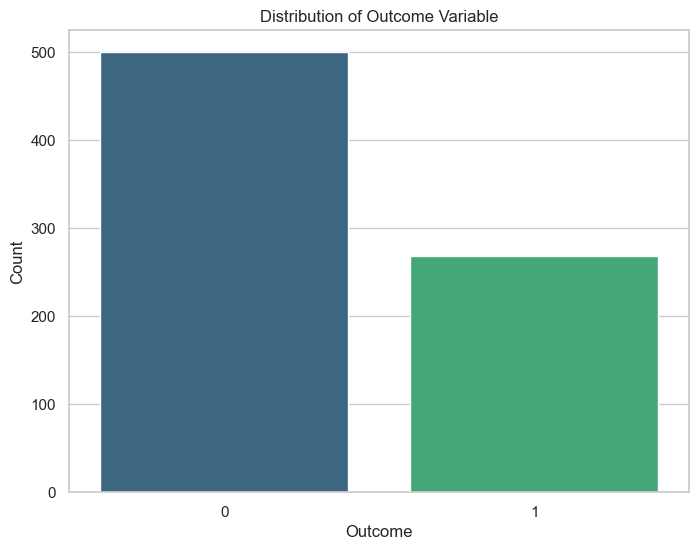

In [128]:
# Plot the distribution of the Outcome variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df, palette='viridis')
plt.title('Distribution of Outcome Variable')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


### Data cleaning

### Identifying missing or zero values

In [129]:

# Identify columns with zero values
zero_value_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count zero values in these columns
zero_counts = df[zero_value_columns].apply(lambda col: (col == 0).sum())

zero_counts


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [130]:
# Replacing zero values with the median of the respective columns
for col in zero_value_columns:
    df[col].replace(0, df[col].median(), inplace=True)

# Calculating the IQR for each column
Q1 = df[zero_value_columns].quantile(0.25)
Q3 = df[zero_value_columns].quantile(0.75)
IQR = Q3 - Q1



### Removing Outliers using IQR

In [131]:

# Identifying outliers using the IQR method
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Removing outliers from the dataset
data_cleaned = df[~outliers.any(axis=1)]

# Display the number of rows removed
rows_removed = df.shape[0] - data_cleaned.shape[0]

data_cleaned.describe(), rows_removed

/var/folders/_7/q65t_5bs3653ct73dh3s10w00000gn/T/ipykernel_96986/4243175029.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))


(       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   672.000000  672.000000     672.000000     672.000000  672.000000   
 mean      3.858631  118.983631      71.901786      26.098214   70.890625   
 std       3.337804   29.181707      10.807730       7.450134   58.525259   
 min       0.000000   44.000000      40.000000      10.000000   15.000000   
 25%       1.000000   99.000000      64.000000      23.000000   30.500000   
 50%       3.000000  115.000000      72.000000      23.000000   30.500000   
 75%       6.000000  136.000000      78.000000      31.000000  105.000000   
 max      17.000000  199.000000     104.000000      45.000000  272.000000   
 
               BMI  DiabetesPedigreeFunction         Age     Outcome  
 count  672.000000                672.000000  672.000000  672.000000  
 mean    31.720089                  0.457356   33.066964    0.327381  
 std      6.300559                  0.310454   11.626707    0.469607  
 min     18.200000   

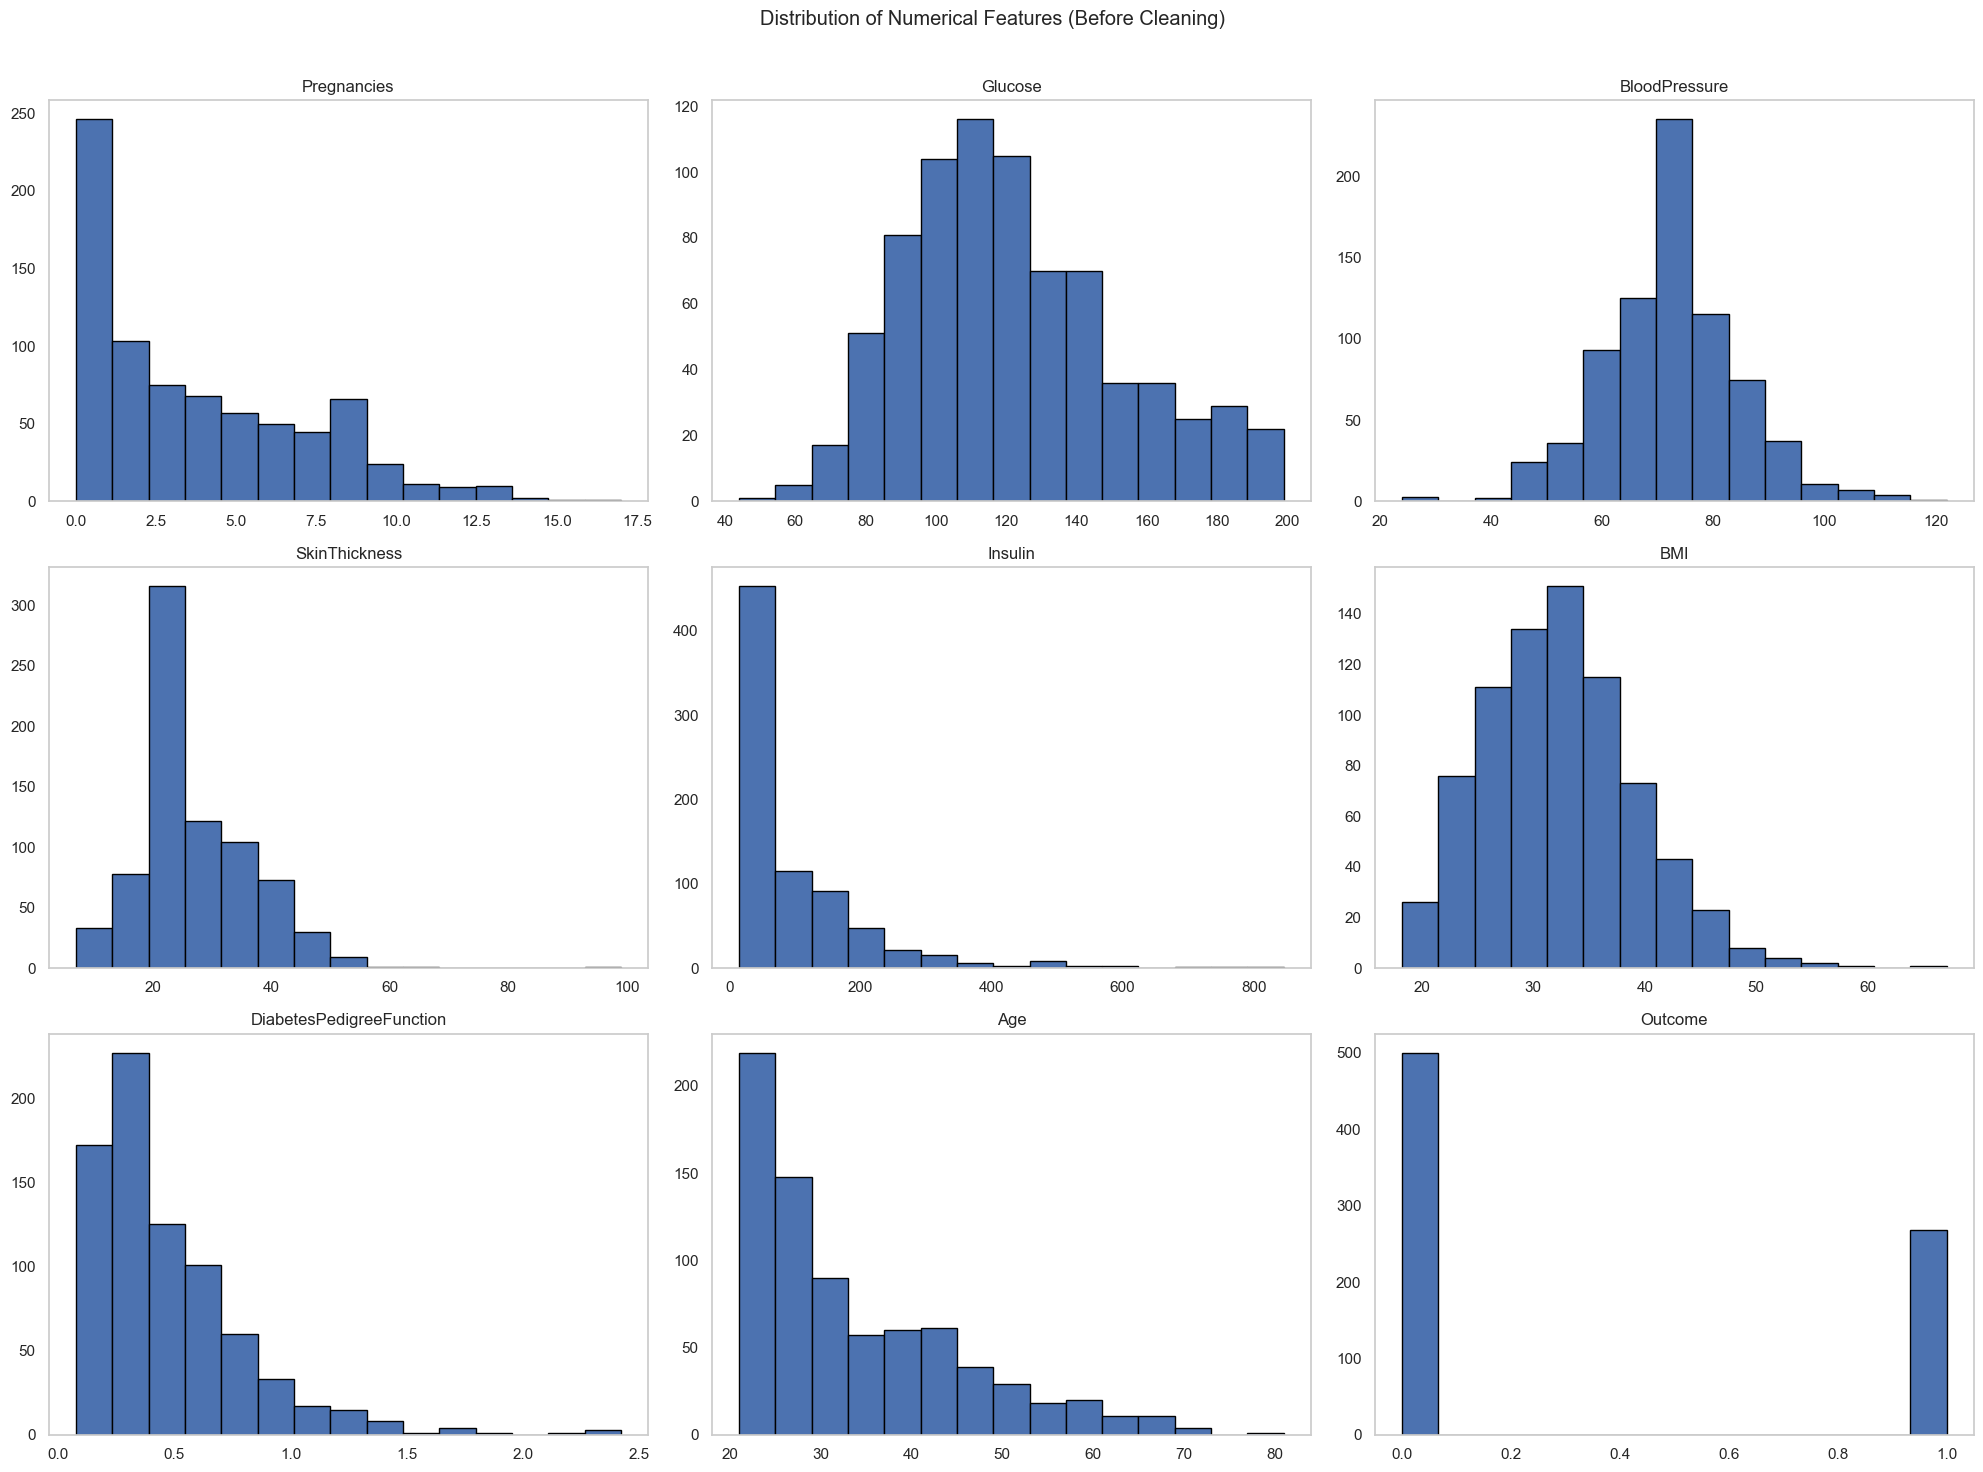

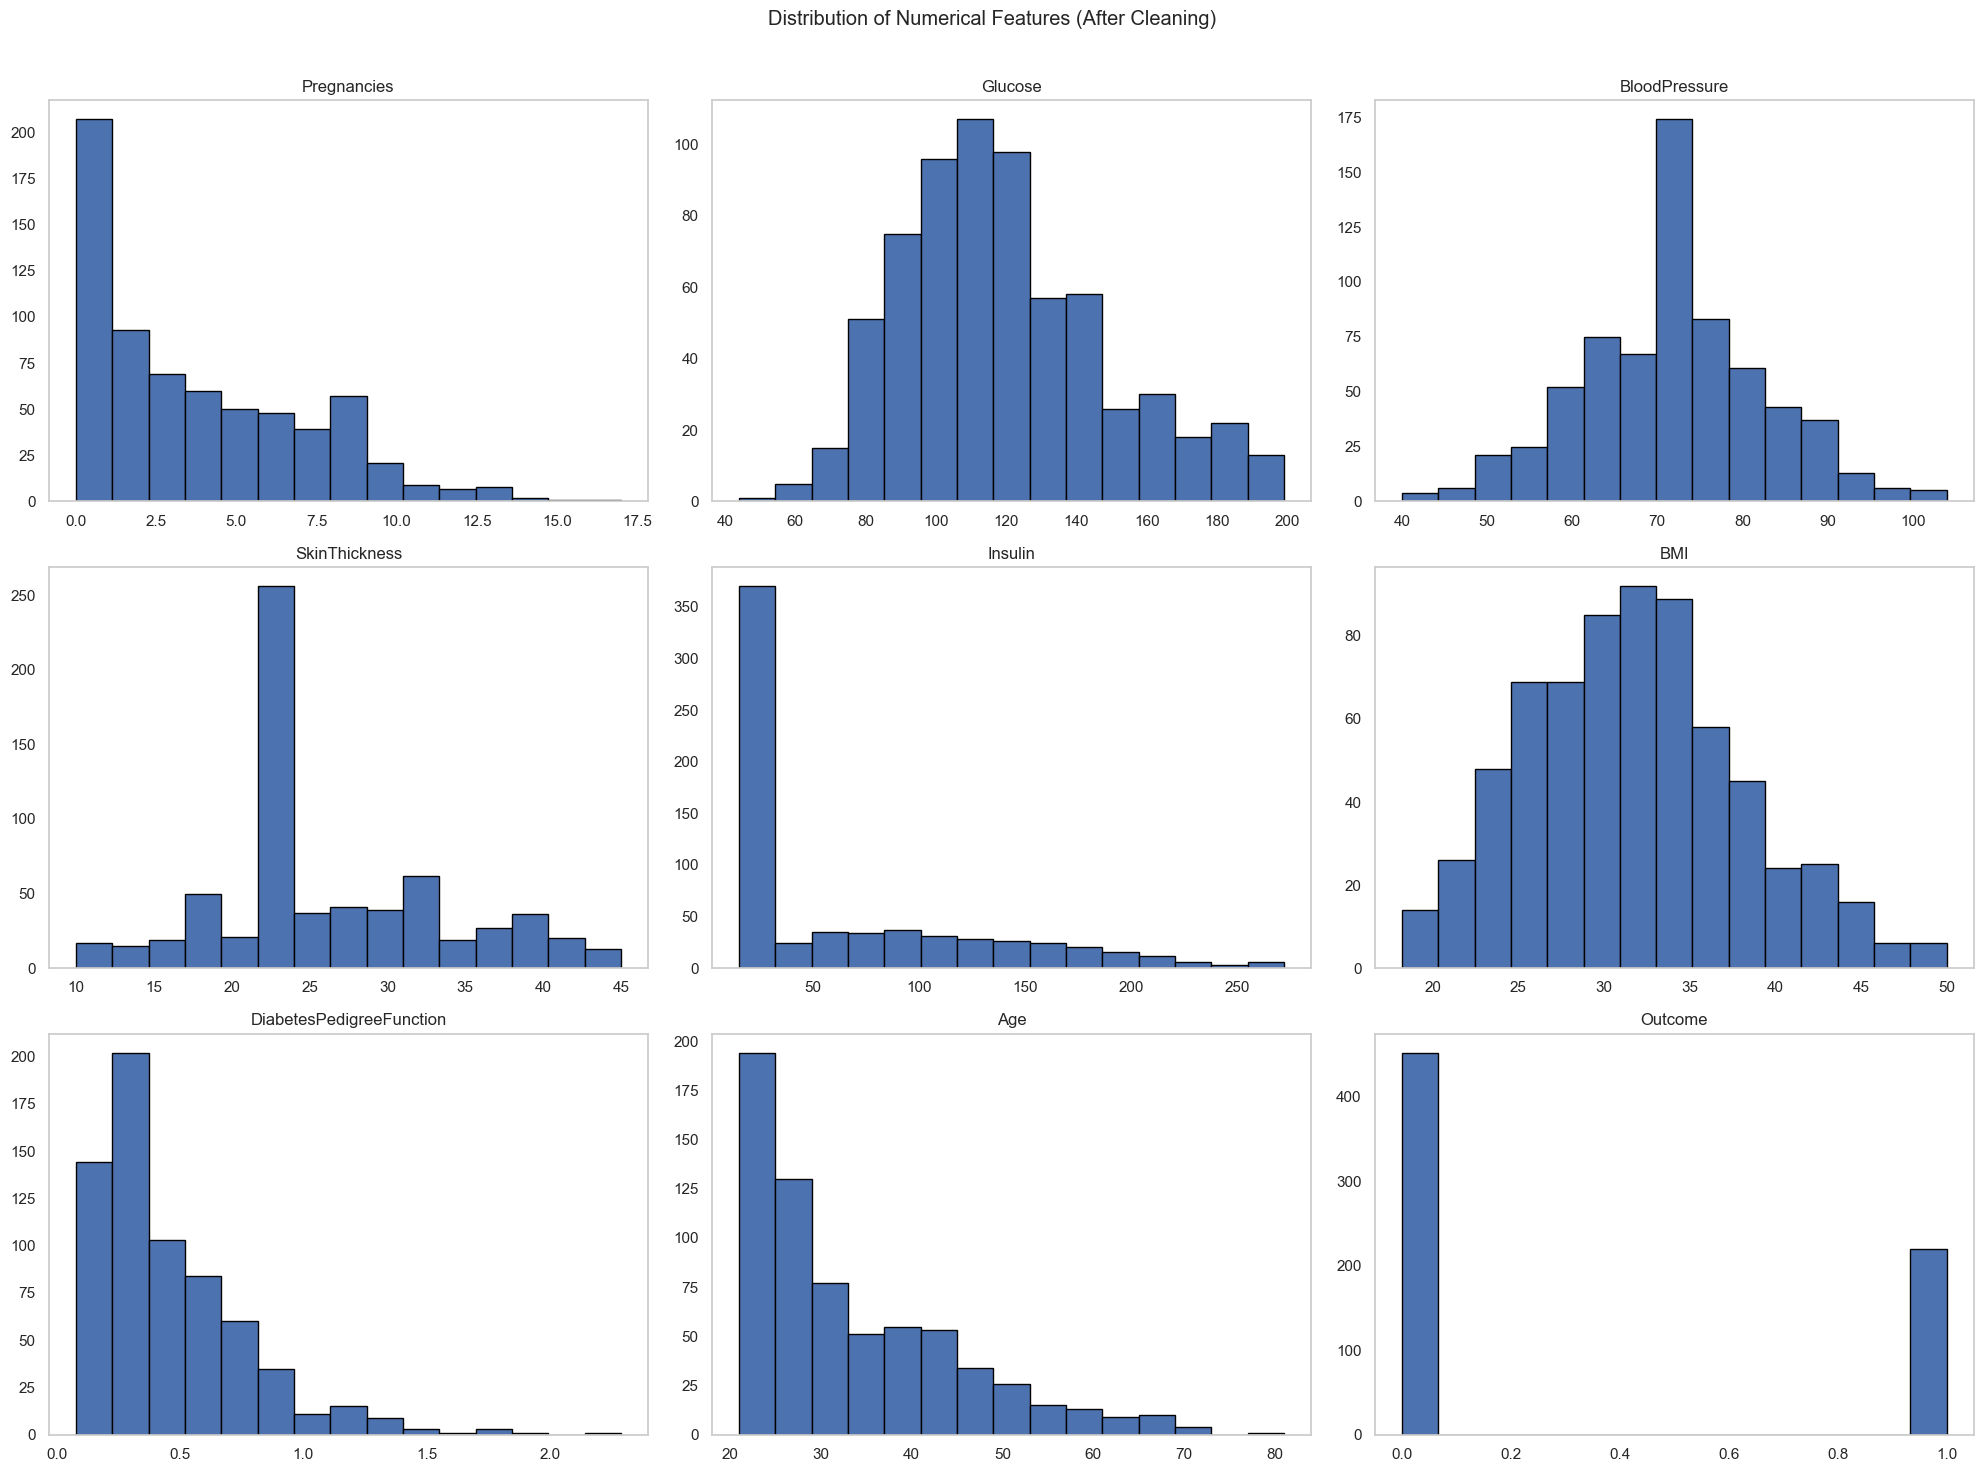

In [132]:
# Visualize the distribution of numerical features after outlier removal
def visualize_distribution(df, title):
    df.hist(bins=15, figsize=(20, 15), layout=(3, 3), edgecolor='black', grid=False)
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

# Visualize before cleaning
visualize_distribution(df, "Distribution of Numerical Features (Before Cleaning)")

# Visualize after cleaning
visualize_distribution(data_cleaned, "Distribution of Numerical Features (After Cleaning)")


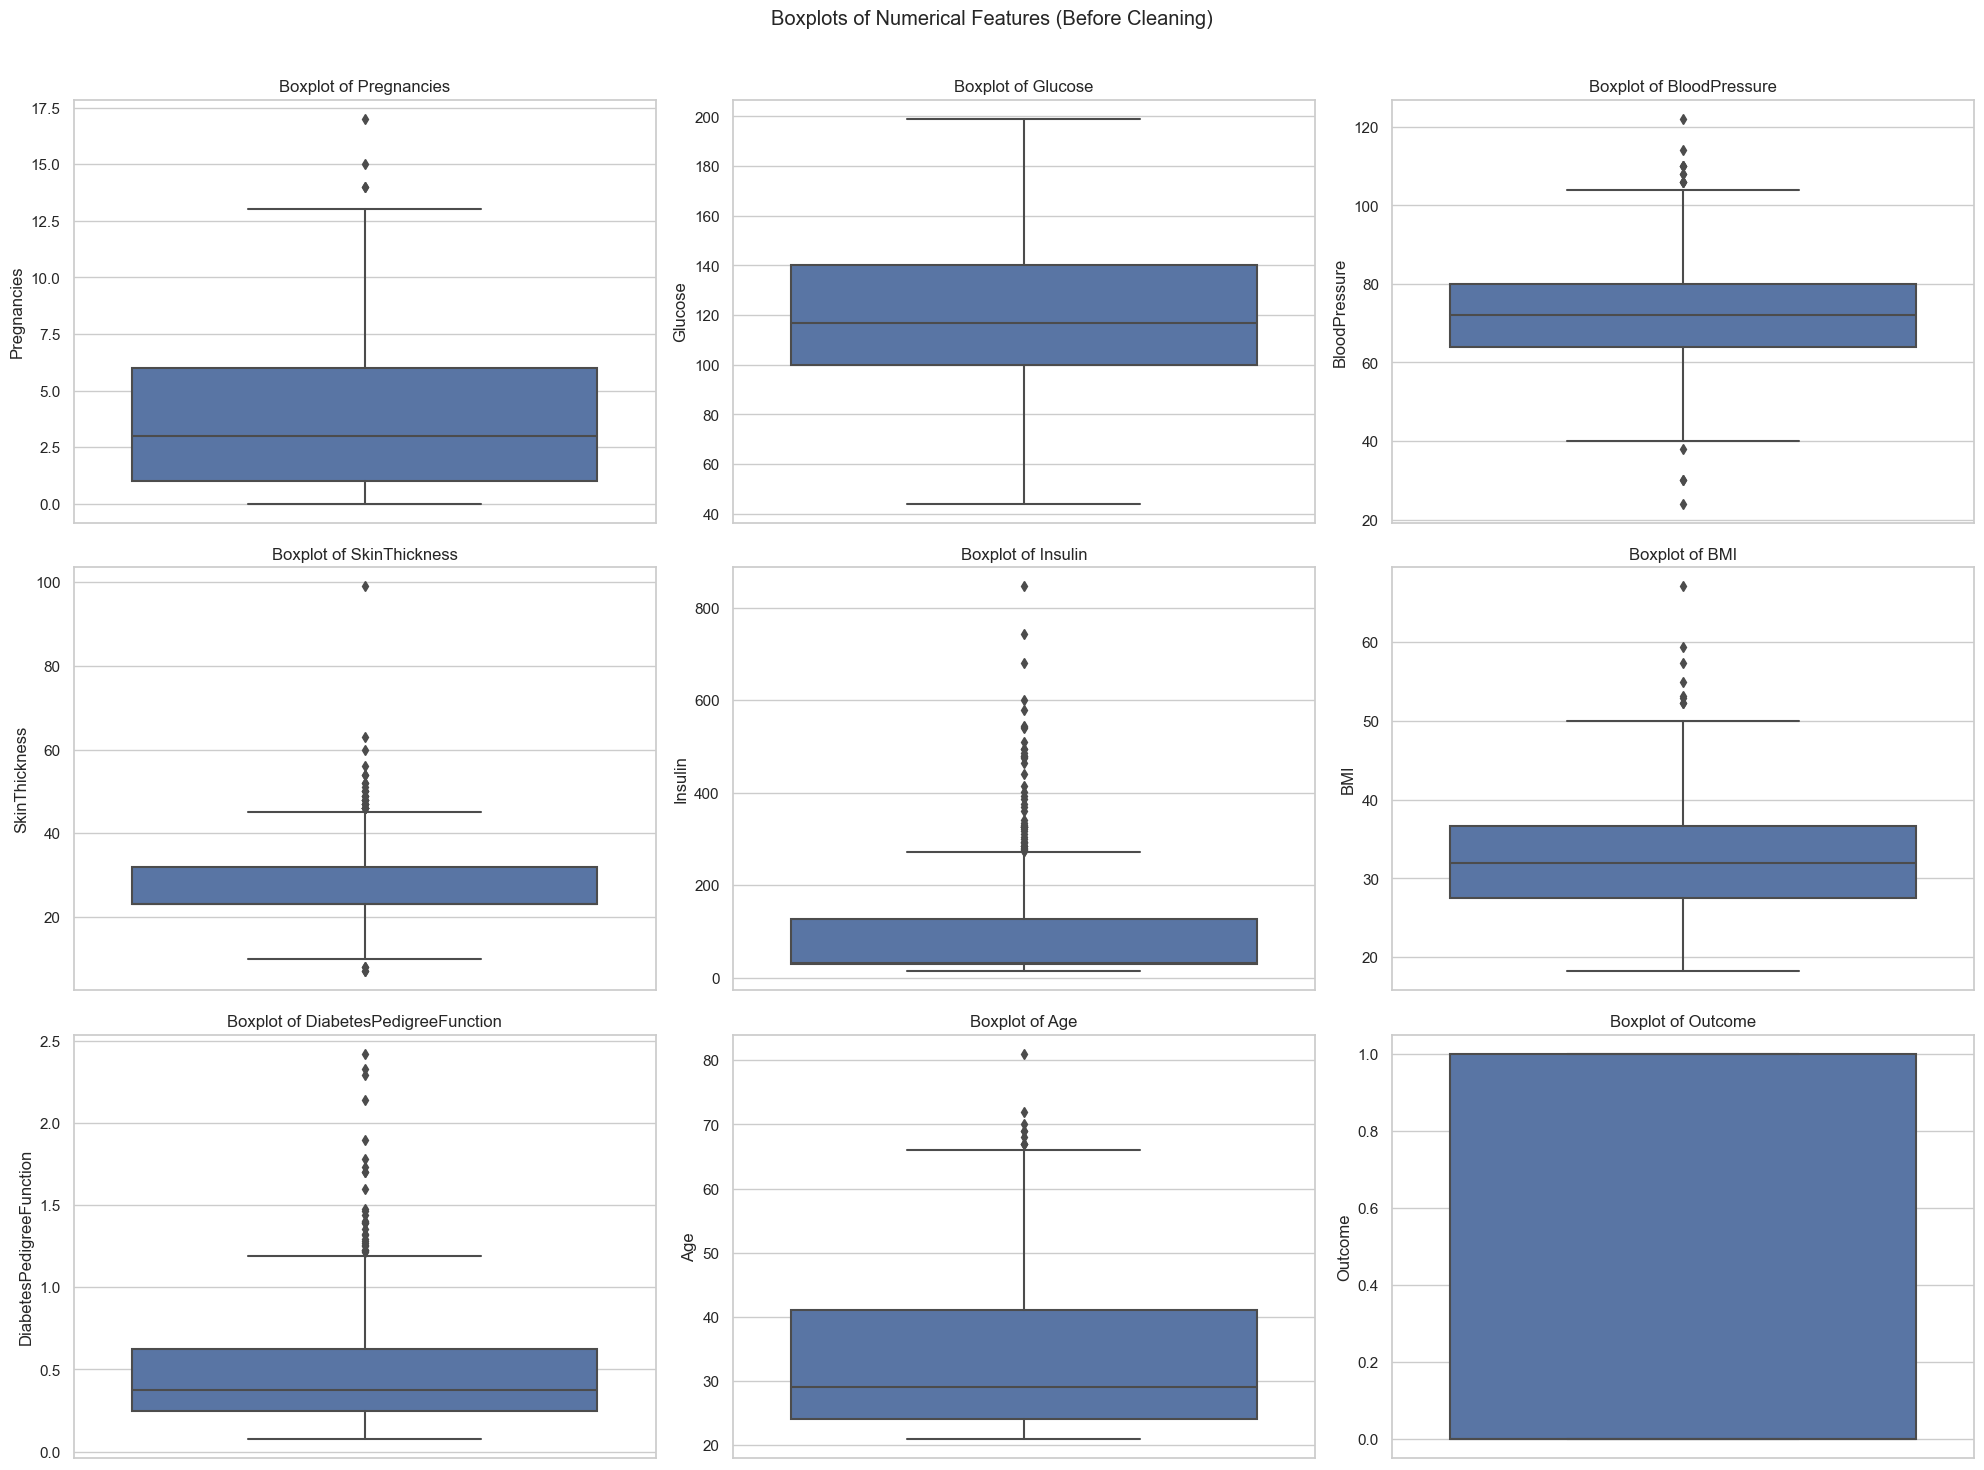

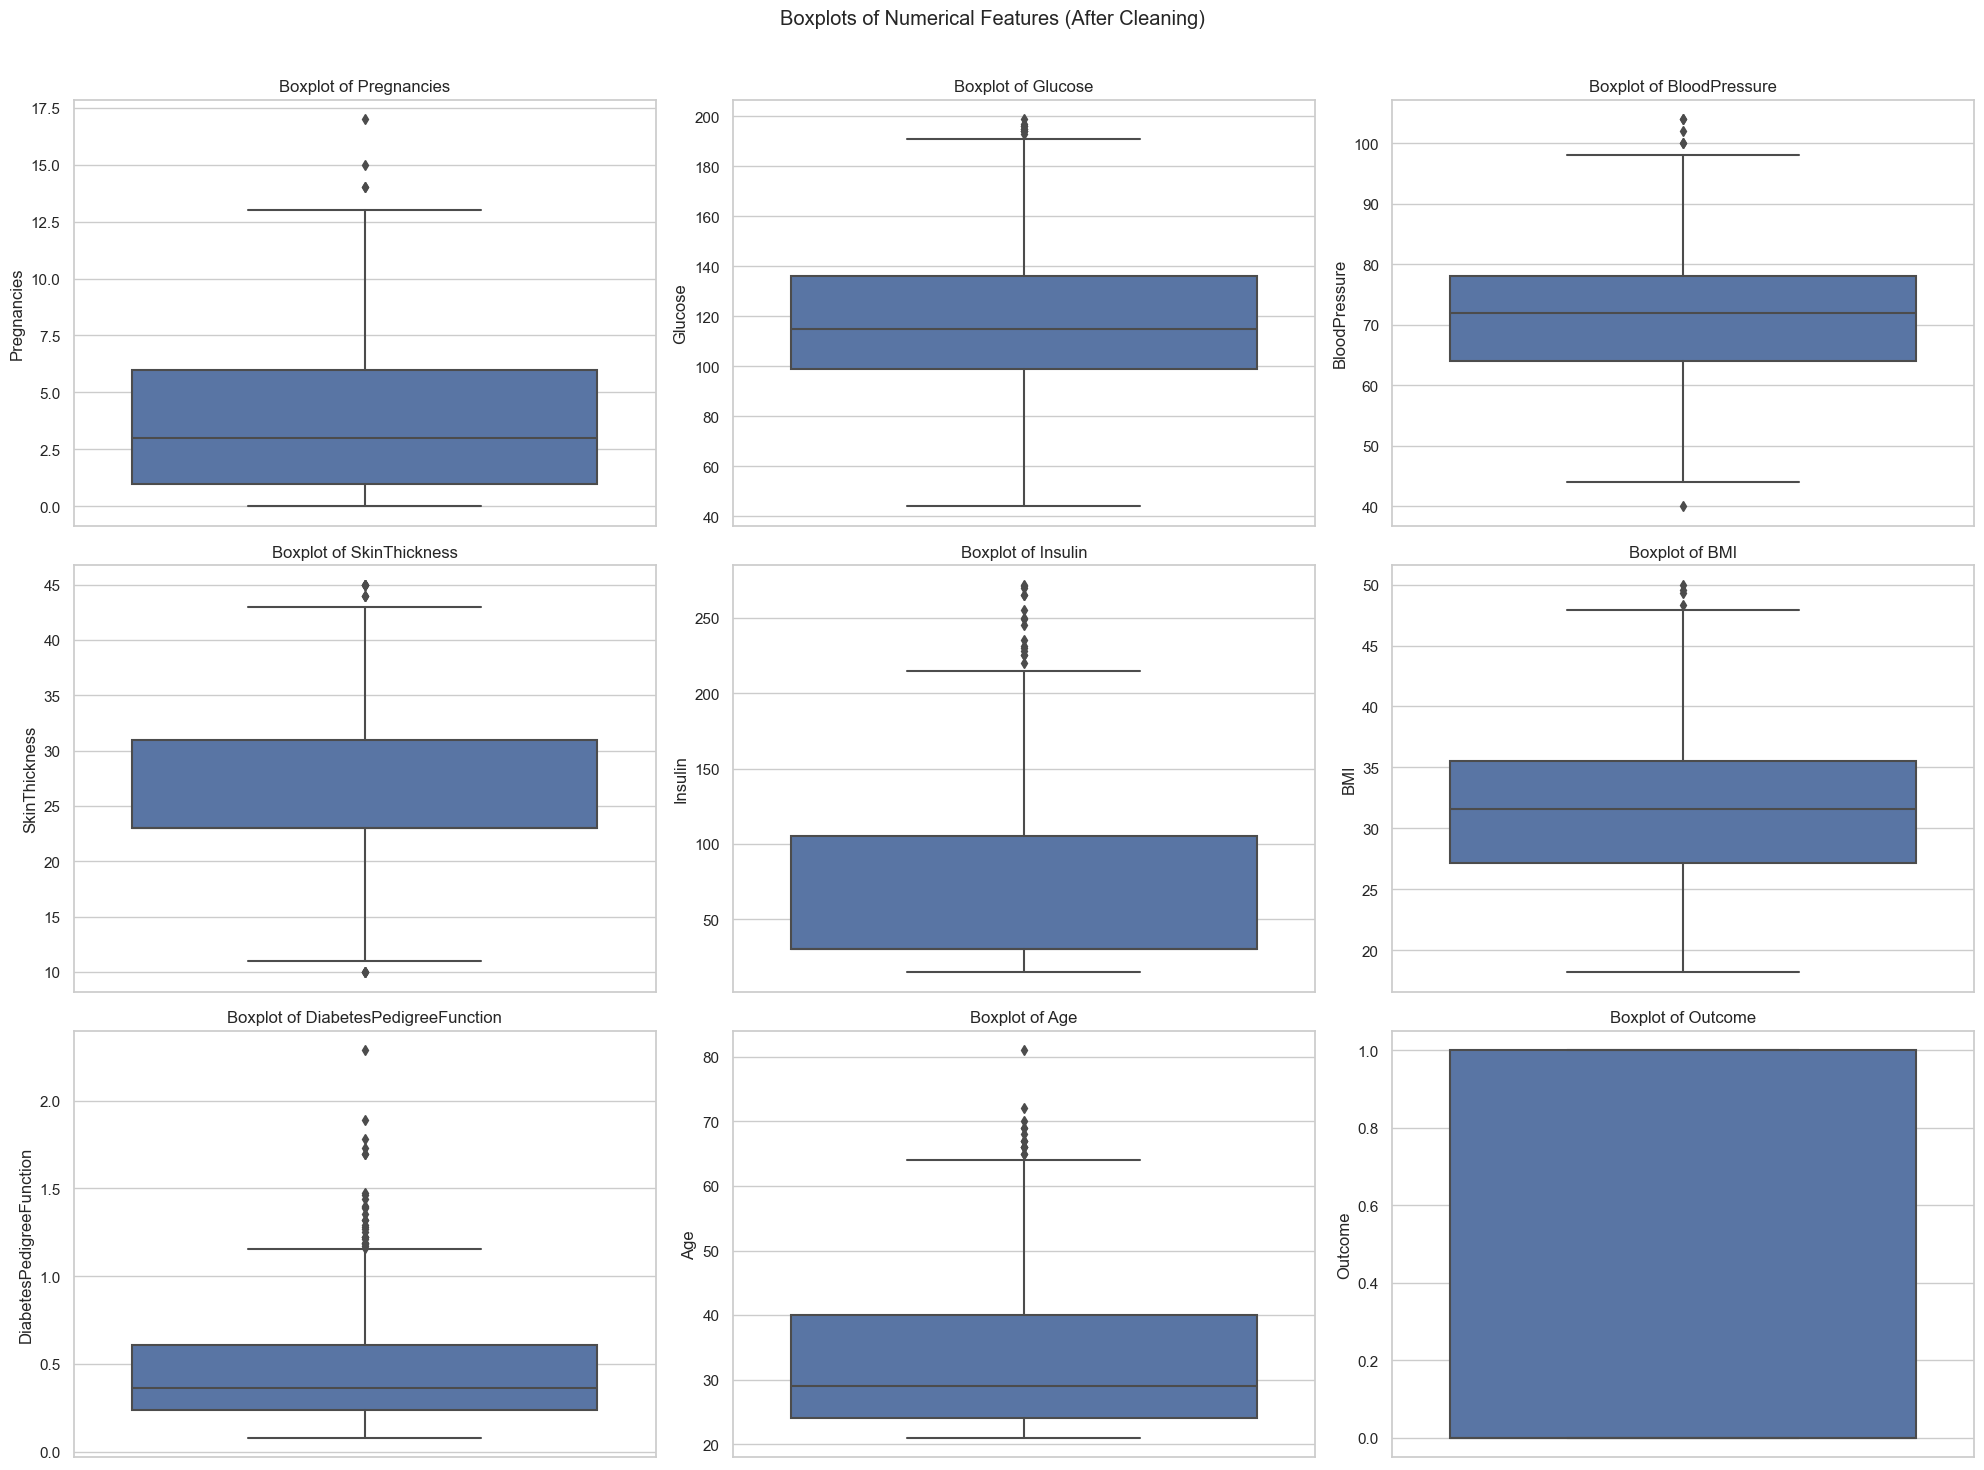

In [133]:
# Visualize the distribution of numerical features using box plots
def visualize_boxplots(df, title):
    plt.figure(figsize=(20, 15))
    for i, column in enumerate(df.columns, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(y=df[column])
        plt.title(f'Boxplot of {column}')
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

# Visualize before cleaning
visualize_boxplots(df, "Boxplots of Numerical Features (Before Cleaning)")

# Visualize after cleaning
visualize_boxplots(data_cleaned, "Boxplots of Numerical Features (After Cleaning)")

In [134]:


# Splitting the dataset into features and target variable
X = data_cleaned.drop('Outcome', axis=1)
y = data_cleaned['Outcome']

# Stratified split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize classifiers
log_reg = LogisticRegression(max_iter=200)
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)




In [135]:
# Fit the models
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predict using the models
y_pred_log_reg = log_reg.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)



In [136]:
# Calculate accuracies
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

accuracies = {
    "Logistic Regression": accuracy_log_reg,
    "KNN": accuracy_knn,
    "Decision Tree": accuracy_decision_tree,
    "Random Forest": accuracy_random_forest
}

accuracies


{'Logistic Regression': 0.8,
 'KNN': 0.7555555555555555,
 'Decision Tree': 0.7851851851851852,
 'Random Forest': 0.7851851851851852}

In this analysis, I cleaned a diabetes dataset by replacing zero values in critical columns with the median and removing outliers using the IQR method, which resulted in the removal of 96 rows. After splitting the cleaned dataset into training and test sets using stratified sampling, we evaluated four classifiers: Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, and Random Forest. The Logistic Regression model achieved the highest accuracy at 80%, followed by Decision Tree and Random Forest at 78.52%, and KNN at 75.56%.

In [137]:


# Scaling the data with MinMaxScaler
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)

# Scaling the data with StandardScaler
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X)



In [138]:

# Splitting the scaled data into train and test sets (for both scalers)
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_minmax_scaled, y, test_size=0.2, stratify=y, random_state=42)
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(X_standard_scaled, y, test_size=0.2, stratify=y, random_state=42)



In [139]:
# Function to fit models and return accuracy
def fit_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)


In [140]:

# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Evaluating models with MinMax Scaled data
accuracies_minmax = {name: fit_and_evaluate_model(model, X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax) 
                     for name, model in models.items()}

# Evaluating models with Standard Scaled data
accuracies_standard = {name: fit_and_evaluate_model(model, X_train_standard, X_test_standard, y_train_standard, y_test_standard) 
                       for name, model in models.items()}

accuracies_minmax, accuracies_standard

({'Logistic Regression': 0.7777777777777778,
  'KNN': 0.7555555555555555,
  'Decision Tree': 0.7851851851851852,
  'Random Forest': 0.7777777777777778},
 {'Logistic Regression': 0.8074074074074075,
  'KNN': 0.7481481481481481,
  'Decision Tree': 0.7851851851851852,
  'Random Forest': 0.7851851851851852})

# Feature engineering

In [141]:
# Selected features based on relevance
selected_features = ['Glucose', 'BMI', 'Age', 'Insulin', 'BloodPressure']

# Removing outliers based on selected features
Q1_selected = data_cleaned[selected_features].quantile(0.25)
Q3_selected = data_cleaned[selected_features].quantile(0.75)
IQR_selected = Q3_selected - Q1_selected

outliers_selected = ((data_cleaned[selected_features] < (Q1_selected - 1.5 * IQR_selected)) | 
                     (data_cleaned[selected_features] > (Q3_selected + 1.5 * IQR_selected)))

data_cleaned_no_outliers = data_cleaned[~outliers_selected.any(axis=1)]




In [142]:
# Splitting the updated dataset into features and target variable
X_no_outliers = data_cleaned_no_outliers.drop('Outcome', axis=1)
y_no_outliers = data_cleaned_no_outliers['Outcome']

# Scaling with Standard Scaler as it performed better
X_no_outliers_standard_scaled = standard_scaler.fit_transform(X_no_outliers)

# Stratified split after removing outliers
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers_standard_scaled, y_no_outliers, test_size=0.2, stratify=y_no_outliers, random_state=42)

# Re-evaluate models after removing outliers
accuracies_no_outliers = {name: fit_and_evaluate_model(model, X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers) 
                          for name, model in models.items()}


# Hyperparameter tuning

In [143]:

# Hyperparameter tuning for Logistic Regression and Random Forest (as they performed well)
param_grid_log_reg = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Logistic Regression tuning
grid_search_log_reg = GridSearchCV(LogisticRegression(max_iter=200), param_grid_log_reg, cv=5)
grid_search_log_reg.fit(X_train_no_outliers, y_train_no_outliers)
best_log_reg = grid_search_log_reg.best_estimator_

# Random Forest tuning
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_no_outliers, y_train_no_outliers)
best_rf = grid_search_rf.best_estimator_

# Re-check accuracy with best parameters
best_accuracy_log_reg = fit_and_evaluate_model(best_log_reg, X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers)
best_accuracy_rf = fit_and_evaluate_model(best_rf, X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers)

accuracies_no_outliers, best_accuracy_log_reg, best_accuracy_rf

({'Logistic Regression': 0.792,
  'KNN': 0.768,
  'Decision Tree': 0.744,
  'Random Forest': 0.792},
 0.792,
 0.8)

# Summary:
Feature Selection: Focused on relevant features such as Glucose, BMI, Age, Insulin, and Blood Pressure to improve model performance
outlier Removal: Improved the data quality, contributing to the model's stability.
Hyperparameter Tuning: Enhanced the Random Forest model, achieving the highest accuracy of 80%.

# Evaluation

In [144]:


# Generate predictions for evaluation
y_pred_log_reg = best_log_reg.predict(X_test_no_outliers)
y_pred_rf = best_rf.predict(X_test_no_outliers)




In [145]:
# Classification Reports
report_log_reg = classification_report(y_test_no_outliers, y_pred_log_reg)
report_rf = classification_report(y_test_no_outliers, y_pred_rf)



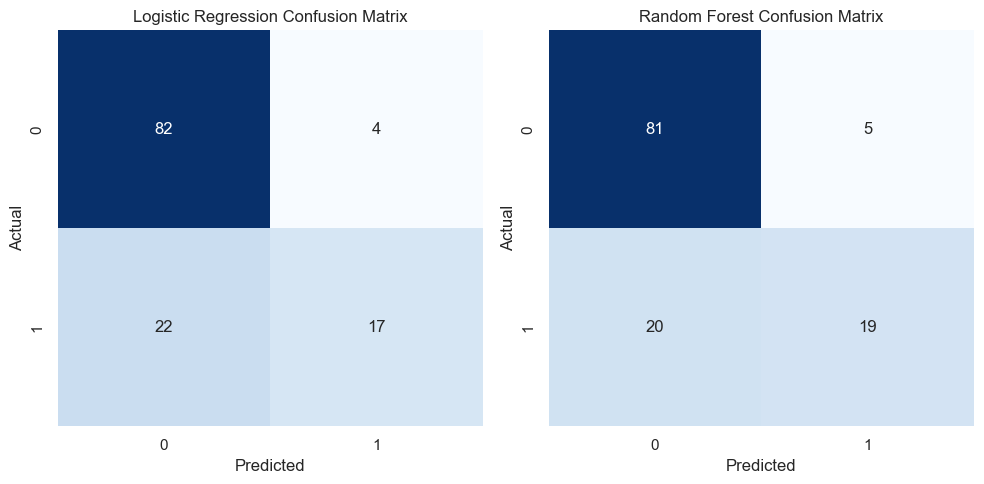

In [146]:
# Confusion Matrices
conf_matrix_log_reg = confusion_matrix(y_test_no_outliers, y_pred_log_reg)
conf_matrix_rf = confusion_matrix(y_test_no_outliers, y_pred_rf)

# Plotting the confusion matrix for Logistic Regression
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plotting the confusion matrix for Random Forest
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()



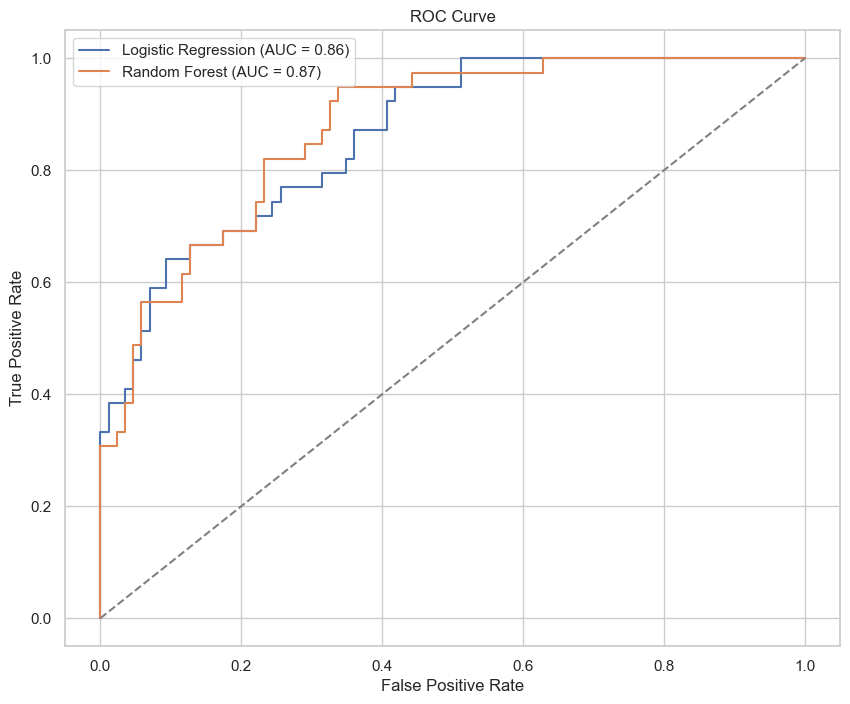

In [147]:
# ROC AUC Scores
roc_auc_log_reg = roc_auc_score(y_test_no_outliers, best_log_reg.predict_proba(X_test_no_outliers)[:, 1])
roc_auc_rf = roc_auc_score(y_test_no_outliers, best_rf.predict_proba(X_test_no_outliers)[:, 1])

# ROC Curves
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test_no_outliers, best_log_reg.predict_proba(X_test_no_outliers)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test_no_outliers, best_rf.predict_proba(X_test_no_outliers)[:, 1])

# Plotting ROC Curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [150]:

# Display results
results = {
    "Logistic Regression ROC AUC": roc_auc_log_reg,
    "Random Forest ROC AUC": roc_auc_rf
}

results

{'Logistic Regression ROC AUC': 0.8634466308884914,
 'Random Forest ROC AUC': 0.8738819320214668}

Confusion Matrices:
The heatmaps show the distribution of true positives, true negatives, false positives, and false negatives for both Logistic Regression and Random Forest models.




ROC Curves:
The ROC curves for both models are plotted with their respective AUC scores. The closer the curve is to the top left corner, the better the model's performance. Both models show good discrimination ability, with Random Forest slightly outperforming Logistic Regression.